In [2]:
import cairo
import IPython.display
from io import BytesIO
import numpy as np

class Display():
    def __init__(self, w, h):
        self.svgio = BytesIO()
        self.w = w
        self.h = h
        
    def __enter__(self):
        surface = cairo.SVGSurface(self.svgio, self.w, self.h)
        context = cairo.Context(surface)
        self.surface = surface
        self.context = context
        return self.context
    
    def show(self):
        self.surface.finish()
        self.surface.flush()
        return IPython.display.SVG(data=self.svgio.getvalue())
        
    def __exit__(self, type, value, traceback):
        pass

In [37]:
def diamond_grid_pos(w, h, size):
    x1 = np.concatenate([np.full(h + 1, 0), np.arange(size, w * size, size)])
    y1 = np.concatenate([np.arange(0, h * size, size), np.full(w, h * size)])
    x2 = np.concatenate([np.arange(0, w * size, size), np.full(h, w * size)])
    y2 = np.concatenate([np.full(w, 0), np.arange(0, size * h, size)])
    return np.array([x1, y1, x2, y2]).T

def diamond_grid_neg(w, h, size):
    x1 = np.concatenate([np.full(h + 1, 0), np.arange(size, w * size, size)])
    y1 = np.concatenate([np.arange(h * size, 0, -size), np.full(w, 0)])
    x2 = np.concatenate([np.arange(0, w * size, size), np.full(h, w * size)])
    y2 = np.concatenate([np.full(w, h * size), np.arange(h * size, 0, -size)])
    return np.array([x1, y1, x2, y2]).T

def diamond_grid(w, h, size):
    return np.concatenate([
        diamond_grid_pos(w, h, size),
        diamond_grid_neg(w, h, size)
    ])

def square_grid(w, h, size):
    hor_x1 = np.full(h + 1, 0)
    hor_x2 = np.full(h + 1, w * size)
    hor_y1 = np.arange(0, (h + 1) * size, size)
    hor_y2 = hor_y1
    
    ver_x1 = np.arange(0, (w + 1) * size, size)
    ver_x2 = ver_x1
    ver_y1 = np.full(w + 1, 0)
    ver_y2 = np.full(w + 1, h * size)
    
    return np.concatenate([
            np.array([hor_x1, hor_y1, hor_x2, hor_y2]).T,
            np.array([ver_x1, ver_y1, ver_x2, ver_y2]).T
        ])

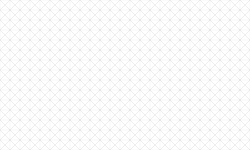

In [42]:
cols = 25
rows = 15
size = 10

display = Display(cols * size, rows * size)

with display as context:
    context.set_line_width(0.1)
    context.set_source_rgba(0, 0, 0, 0.4)
    for row in diamond_grid(cols, rows, size):
        x1, y1, x2, y2 = tuple(row)
        context.move_to(x1, y1)
        context.line_to(x2, y2)
        context.stroke()
        
    context.set_source_rgba(0, 0, 0, 0.3)
    for row in square_grid(cols, rows, size):
        x1, y1, x2, y2 = tuple(row)
        context.move_to(x1, y1)
        context.line_to(x2, y2)
        context.stroke()
        
    
        
display.show()